# Prediction using Unsupervised Machine Learning
### Problem Statement:
#### For given Iris Dataset, predict the optimum number of clusters and represnt it visually.
Methods:

- KMeans Clustering
- Hierarchical Clustering

Importing all the necesarry packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

### Loading the Dataset and Formatting it:
- Dropping the Id column.
- Rescaling the data set.

In [2]:
df = pd.read_csv('Iris.csv')
df.drop(columns=['Id'], inplace=True)

m_0 = max(df.iloc[:, 0]) 
m_1 = max(df.iloc[:, 1]) 
m_2 = max(df.iloc[:, 2]) 
m_3 = max(df.iloc[:, 3]) 


l = max([m_0, m_1, m_2, m_3])
df.iloc[:, 0] = (df.iloc[:, 0]/l)*1000
df.iloc[:, 1] = (df.iloc[:, 1]/l)*1000
df.iloc[:, 2] = (df.iloc[:, 2]/l)*1000
df.iloc[:, 3] = (df.iloc[:, 3]/l)*1000

df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,645.569620,443.037975,177.215190,25.316456,Iris-setosa
1,620.253165,379.746835,177.215190,25.316456,Iris-setosa
2,594.936709,405.063291,164.556962,25.316456,Iris-setosa
3,582.278481,392.405063,189.873418,25.316456,Iris-setosa
4,632.911392,455.696203,177.215190,25.316456,Iris-setosa
5,683.544304,493.670886,215.189873,50.632911,Iris-setosa
6,582.278481,430.379747,177.215190,37.974684,Iris-setosa
7,632.911392,430.379747,189.873418,25.316456,Iris-setosa
8,556.962025,367.088608,177.215190,25.316456,Iris-setosa
9,620.253165,392.405063,189.873418,12.658228,Iris-setosa


### Plotting graphs to visualize the data:
Trying to find out the relation between all the quantities of the data set:

    - Plotting pairplots
    - Plotting heatmap

<Figure size 288x288 with 0 Axes>

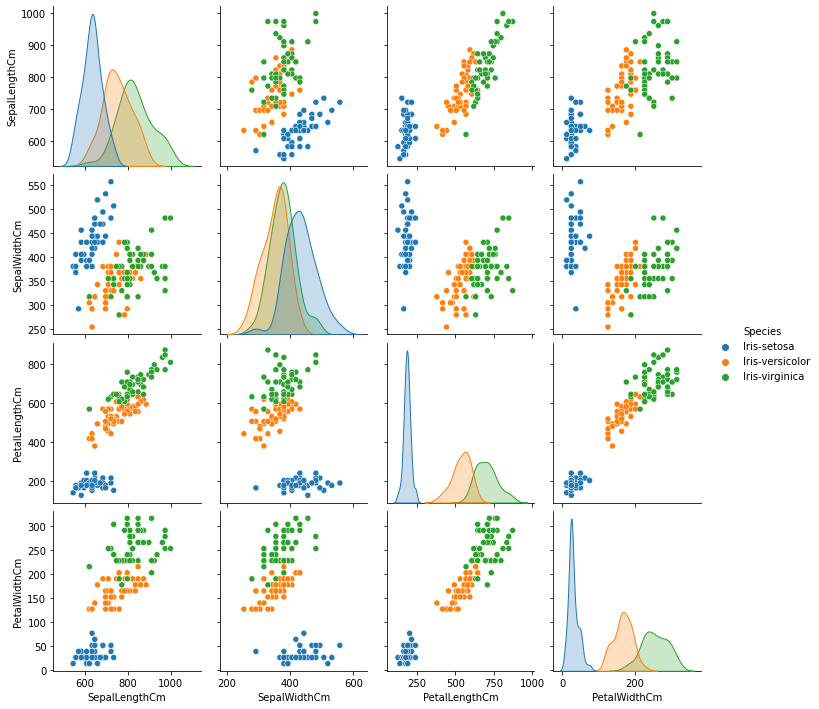

In [3]:
plt.figure(figsize = (4, 4))
sns.color_palette('rainbow')
sns.pairplot(df, hue = 'Species')
plt.show()

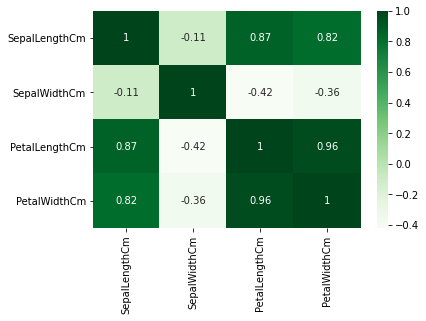

In [4]:
df.drop(columns=['Species'], inplace = True)
sns.heatmap(df.corr(), cmap = 'Greens', annot = True)
plt.show()

### Predicting the Optimum Number of Clusters:
**For this task we will be using scikit learn we will feed the data to the model multiple times and check the number of clusters which would be best for clustering.**

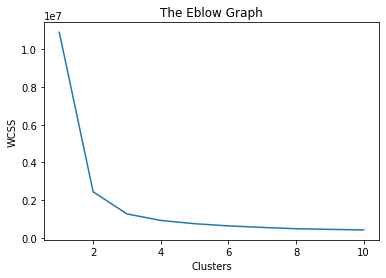

In [5]:
x = df.iloc[:, 0:4].values

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
wcss

plt.plot([i for i in range(1, 11)], wcss)
plt.title('The Eblow Graph')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

**As you can see in the above graph there is a massive drop in the value of WCSS from 2 to 4 this region forms the elbow of the graph and thus we can conclude that 3 clusters would be optimum for our algorithm**

### Training the model with Optimum Clusters:


In [6]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, random_state = 43, init = 'k-means++', n_init = 10)
pred = kmeans.fit_predict(x)

df['Categories'] = pred
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Categories
0,645.569620,443.037975,177.215190,25.316456,1
1,620.253165,379.746835,177.215190,25.316456,1
2,594.936709,405.063291,164.556962,25.316456,1
3,582.278481,392.405063,189.873418,25.316456,1
4,632.911392,455.696203,177.215190,25.316456,1


### Visualizing the data :
We will use Scatter Plot for this visualization:
- Plot the members of each category using different colours.
- Plot the centroids 

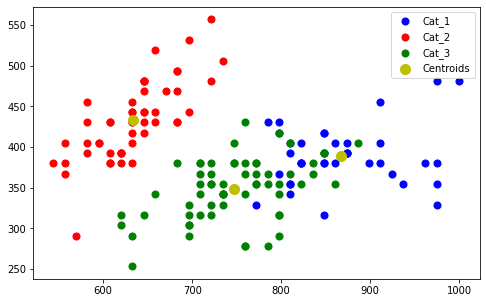

In [7]:
df_0 = df[df['Categories'] == 0]
df_1 = df[df['Categories'] == 1]
df_2 = df[df['Categories'] == 2]

plt.figure(figsize=(8,5))

plt.scatter(df_0.iloc[:, 0], df_0.iloc[:, 1] , color = 'b', label = 'Cat_1', s= 50)

plt.scatter(df_1.iloc[:, 0], df_1.iloc[:, 1] , color = 'r', label = 'Cat_2', s= 50)

plt.scatter(df_2.iloc[:, 0], df_2.iloc[:, 1] , color = 'g', label = 'Cat_3', s= 50)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'y', label = 'Centroids', s = 100)

plt.legend()

### Trying to analyze using Hierarchical Clustering :
**Using Hierarchical Clustering to see if better accuracy can be achieved or not.**

**Importing the necessary pacakges for hierarchical clustering.**

In [8]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

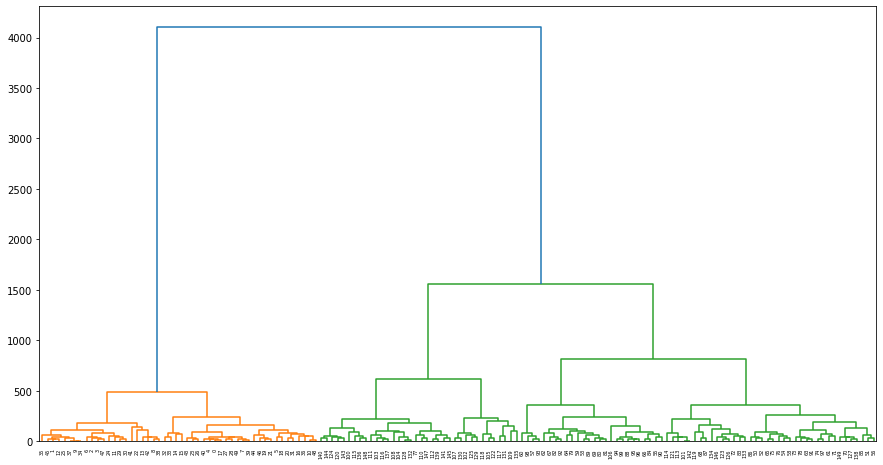

In [9]:
x = df.iloc[:, 0:4].values
X = sch.linkage(x, 'ward')
plt.figure(figsize = (15, 8))
dendrogram = sch.dendrogram(X)

### Training the model using our data:
As we know that the optimum clusters for this dataset is 3 from the the **elbow graph** that we plotted earlier we will directly use the value of clusters as 3.

In [10]:
cluster = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
pred = cluster.fit_predict(x)
pred
df['Categories'] = pred
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Categories
0,645.569620,443.037975,177.215190,25.316456,1
1,620.253165,379.746835,177.215190,25.316456,1
2,594.936709,405.063291,164.556962,25.316456,1
3,582.278481,392.405063,189.873418,25.316456,1
4,632.911392,455.696203,177.215190,25.316456,1


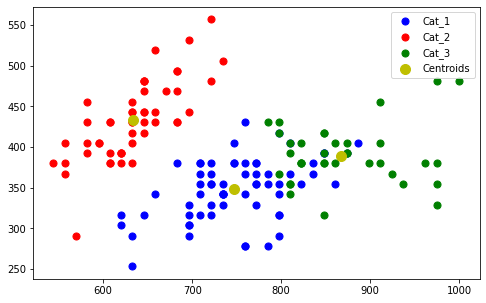

In [11]:
df_0 = df[df['Categories'] == 0]
df_1 = df[df['Categories'] == 1]
df_2 = df[df['Categories'] == 2]

plt.figure(figsize=(8,5))

plt.scatter(df_0.iloc[:, 0], df_0.iloc[:, 1] , color = 'b', label = 'Cat_1', s= 50)

plt.scatter(df_1.iloc[:, 0], df_1.iloc[:, 1] , color = 'r', label = 'Cat_2', s= 50)

plt.scatter(df_2.iloc[:, 0], df_2.iloc[:, 1] , color = 'g', label = 'Cat_3', s= 50)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'y', label = 'Centroids', s = 100)

plt.legend()

### Conclusion:

As we can notice that both the results that we got using KMeans and Hierarchical clustering are very similar but we achieved better accuracy using Hierarchical Clustering.